# First Problem

In the article [1] we can see an example of tensor in figure 4. The construction of this tensor is described there. They try to compute a non-negative CPD for this tensor in this article. This is possible since the figure can be considered as having only $0$'s and $1$'s. 

Here we will construct the same tensor (the *swimmer_tensor* module) and use the **cpd** function with $r = 50$ to computes its CPD. This value of $r$ is suggested in the same article.


[1] *Non-Negative Tensor Factorization with Applications to Statistics and Computer Vision* - A. Shashua and T. Hazan 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TensorFox as tf
import swimmer_tensor as st

In [2]:
# Create tensor T. It has shape 32 x 32 x 256. 
T = st.create()
m, n, p = T.shape
Tsize = np.linalg.norm(T)

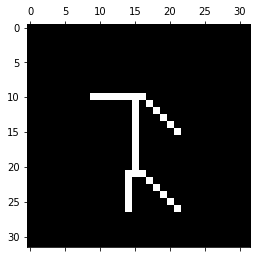

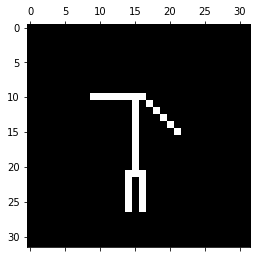

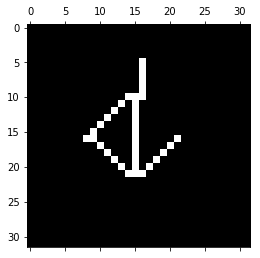

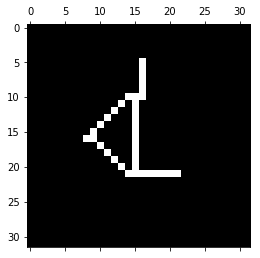

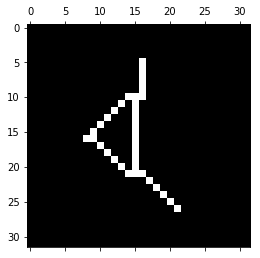

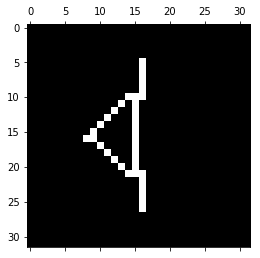

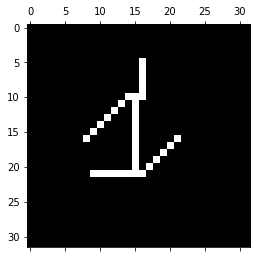

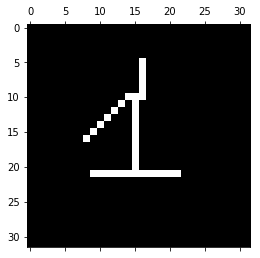

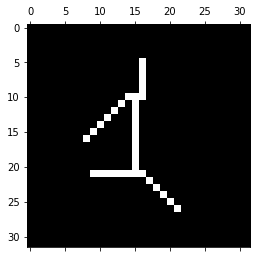

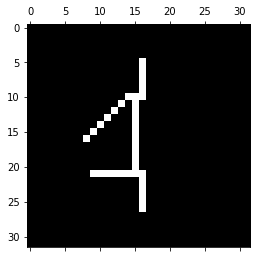

In [8]:
# Visualize some frames, i.e., some frontal slices of the tensor.
for s in range(190,200):
    plt.matshow(T[:,:,s],cmap='Greys')

In [4]:
# Compute the CPD of T, assuming T has rank 50. 
# We will use default options for now, except the display option, which will be set to 'partial'.
r = 50
Lambda, X, Y, Z, T_approx, rel_err, step_sizes_trunc, step_sizes_ref, errors_trunc, errors_ref = tf.cpd(T, r, display='partial')

------------------------------------------------------------------------------
Starting computation of the HOSVD of T.
------------------------------------------------------------------------------
Compression detected. Compressing from (32, 32, 256) to (23, 15, 13)
Compression relative error = 1.2971681229766196e-15
------------------------------------------------------------------------------
Starting truncation.
Truncation detected. Truncating from (23, 15, 13) to (16, 15, 13)
99.9206 % of the energy was retained.
Truncation relative error = 0.04880940534359115
------------------------------------------------------------------------------
Initialization: smart random
Relative error of initial guess = 0.1572968048393296
------------------------------------------------------------------------------
Starting damped Gauss-Newton method.
------------------------------------------------------------------------------
Starting refinement.
----------------------------------------------------

# Analyzing and Visualizing the Solution

Our solution above can be considered as satisfactory since the relative error is of order $O(10^{-3})$. This time, notice that we were able to compress the tensor (using HOSVD) and then truncating it (using the relative error strategy with 'energy' = $0.05$). The error of the starting point is close to $0.0455$, which means we start iterating already very close to the solution. This is for the truncation stage, because in the refinement stage the initial error is close to $0.157$. This is not amazing, but much better than $1.0$, the error we would have if just guessing randomly.

As we did before, let's plot the step sizes of all iterations.

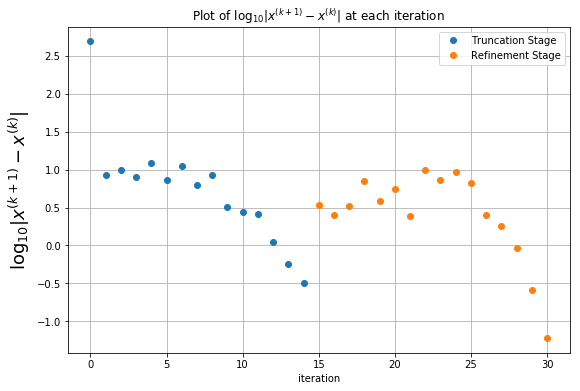

In [5]:
# Plot the step sizes of the iterations.
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6

sst = step_sizes_trunc.shape[0]
ssr = step_sizes_ref.shape[0]
et = errors_trunc.shape[0]
er = errors_ref.shape[0]

plt.plot(np.arange(0,sst), np.log10(step_sizes_trunc), 'o', markersize=6, label='Truncation Stage')
plt.plot(np.arange(sst,sst+ssr), np.log10(step_sizes_ref), 'o', markersize=6, label='Refinement Stage')
plt.title(r'Plot of $\log_{10} \|x^{(k+1)} - x^{(k)} \|$ at each iteration', fontsize=12)
plt.xlabel('iteration')
plt.ylabel(r'$\log_{10} \|x^{(k+1)} - x^{(k)} \|$', fontsize=18)
plt.grid()
plt.legend()
plt.show()

As expected, in both stages the steps tends to be smaller as the algorithm converges. Before that the algorithm takes larger steps. Now let's plot the errors of all iterations.

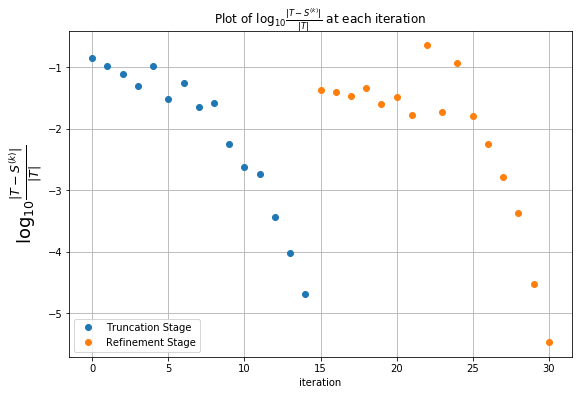

In [6]:
# Plot the relative error of the iterations. Since the output errors of the cpd are absolute errors,
# we mist divide them by the norm of T.
Tsize = np.linalg.norm(T)

plt.plot(np.arange(0,et), np.log10(1/Tsize*errors_trunc), 'o', markersize=6, label='Truncation Stage')
plt.plot(np.arange(et,et+er), np.log10(1/Tsize*errors_ref), 'o', markersize=6, label='Refinement Stage')
plt.title(r'Plot of $\log_{10} \frac{\|T - S^{(k)}\|}{|T|}$ at each iteration', fontsize=12)
plt.xlabel('iteration')
plt.ylabel(r'$\log_{10} \frac{\|T - S^{(k)}\|}{|T|}$', fontsize=18)
plt.grid()
plt.legend()
plt.show()

The errors behave as expected too. As soon as the refinement stage begans, the error increases. This is expected since we are now working in a space with higher dimension than the space of the truncation stage. But note that with just a few iteartions the algorithm starts to converge.

Below we show some slices of our computed tensor. We show the same slices plotted before so we can compare them. As we can see, it is almost impossible to notice some difference with the naked eye. The CPD computed is a success!

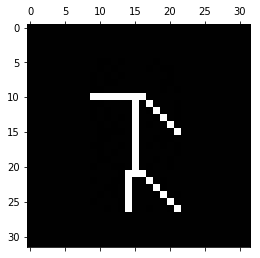

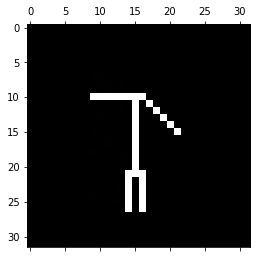

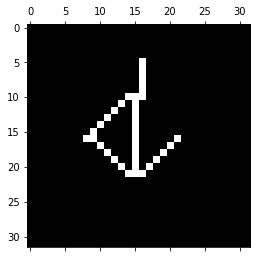

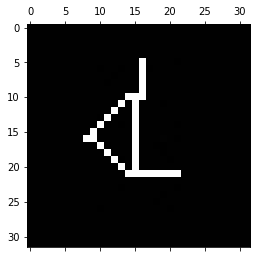

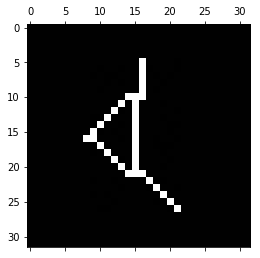

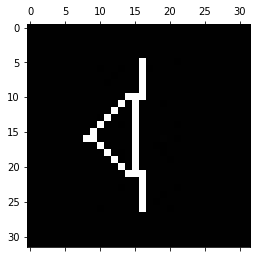

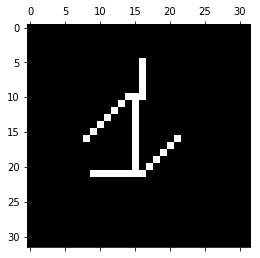

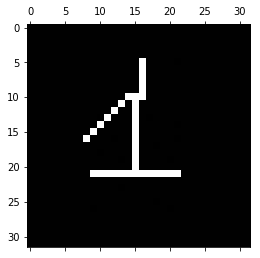

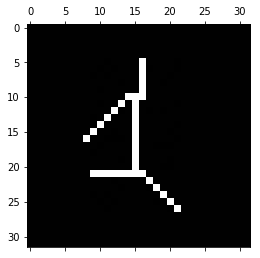

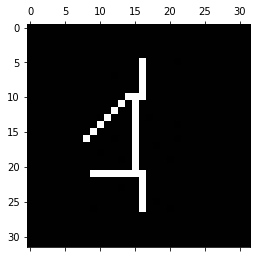

In [13]:
fig_size[0] = 6
fig_size[1] = 4

for s in range(190,200):
    plt.matshow(T_approx[:,:,s],cmap='Greys')

To finish, we may have noted that the computation of this CPD is not always good. Sometimes we need to repeat the computation to get a good CPD. This is due to the initialization point for the iteration. Althought the strategy used in TensorFox always generates a initial point close to the objetive point, the path of the iteration may lead to a local optima. This phenomenon is not exclusive to TensorFox, and probably all solvers suffers from this issue. 

For this problem in particular we can use the function **stats** to see how the initialization changes the results.

10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
100 %


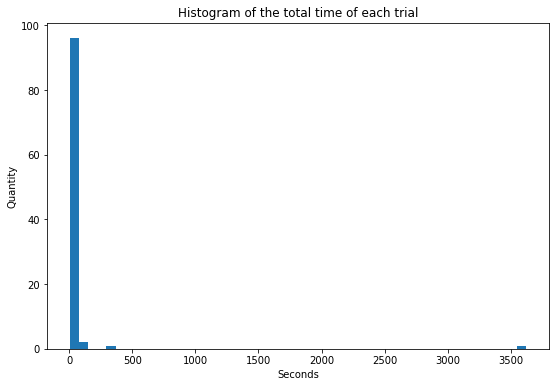

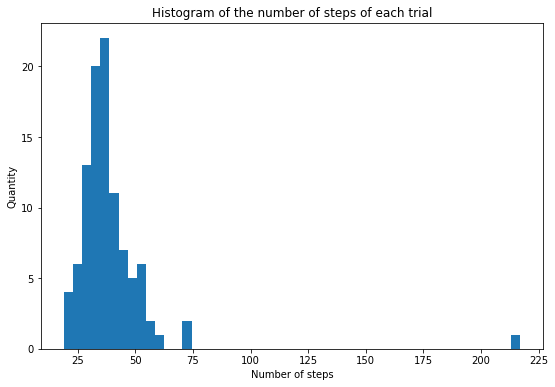

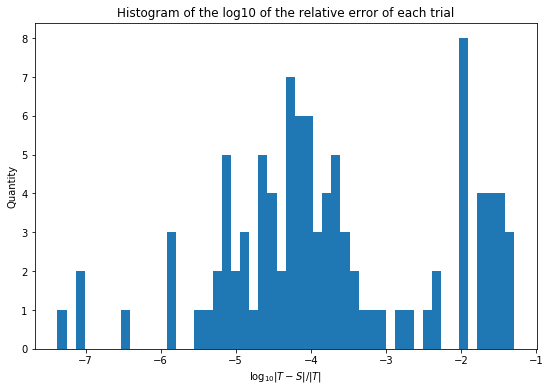

In [7]:
times, steps, rel_errors = tf.stats(T, r)

In [8]:
print('E[seconds] =', times.mean())
print()
print('E[number of steps] =', steps.mean())
print()
print('E[relative error] =', rel_errors.mean())

E[seconds] = 65.44781308174133

E[number of steps] = 39.12

E[relative error] = 0.005523722824265831


We can see there is an outlier which took much more time and more steps than the other trials. Leaving this aside, the overall distribution is actually very nice. The number of iterations is almost always small and the computational time concentrates between $25$ and $60$ seconds. The error also concentrates in a nice interval, between $-5$ and $-3$ (in $log_{10}$ scale). It is not hard to guess we can have an error of order $O(10^{-5})$ if we try to compute a few CPD's, maybe three or four. 